In [22]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data=pd.read_csv('/content/sample_data/Dataset1 .csv')

In [23]:
data['Price Range Category'] = pd.cut(data['Average Cost for two'], bins=[0, 500, 1000, 1500, 5000], labels=['Low', 'Medium', 'High', 'Very High'])
most_common_price_range = data['Price Range Category'].value_counts()
print("Most common price range:")
print(most_common_price_range)

Most common price range:
Price Range Category
Low          6056
Medium       2302
High          591
Very High     552
Name: count, dtype: int64


In [24]:
avg_rating_per_price_range = data.groupby('Price Range Category')['Aggregate rating'].mean().round(2)

print("Average rating for each price range:")
print(avg_rating_per_price_range)

Average rating for each price range:
Price Range Category
Low          2.32
Medium       3.06
High         3.64
Very High    3.67
Name: Aggregate rating, dtype: float64


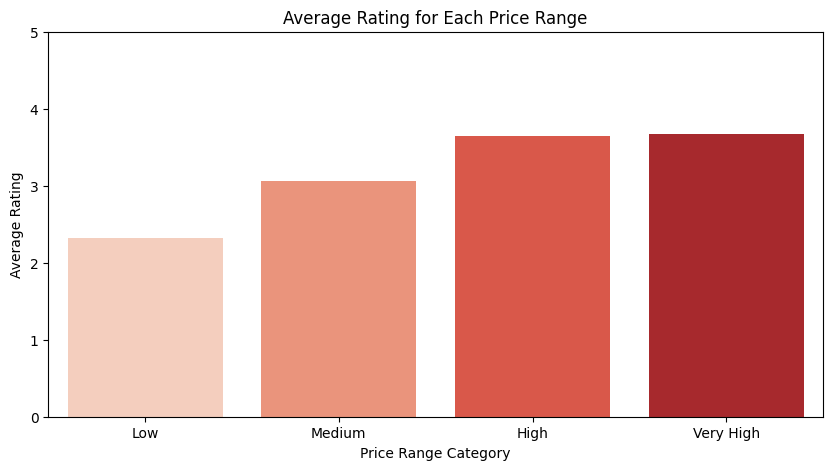

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_rating_per_price_range.index, y=avg_rating_per_price_range.values, palette='Reds')
plt.title('Average Rating for Each Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Setting limit for ratings (typically from 0 to 5)
plt.show()

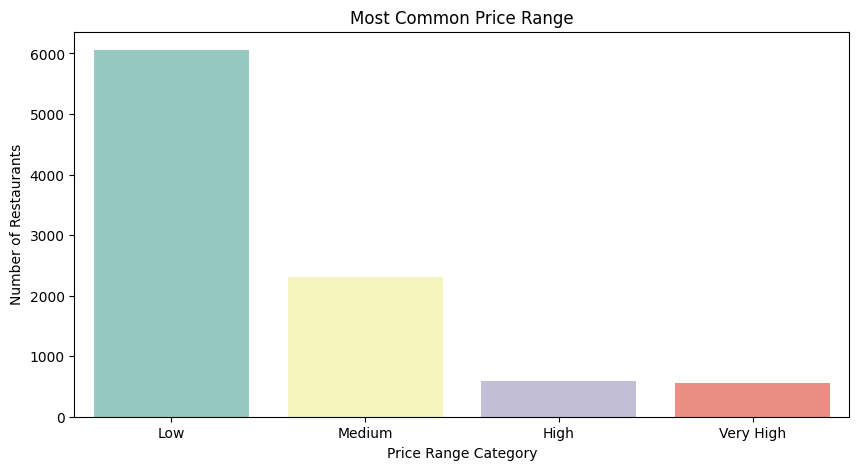

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x=most_common_price_range.index, y=most_common_price_range.values, palette='Set3')
plt.title('Most Common Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Number of Restaurants')
plt.show()

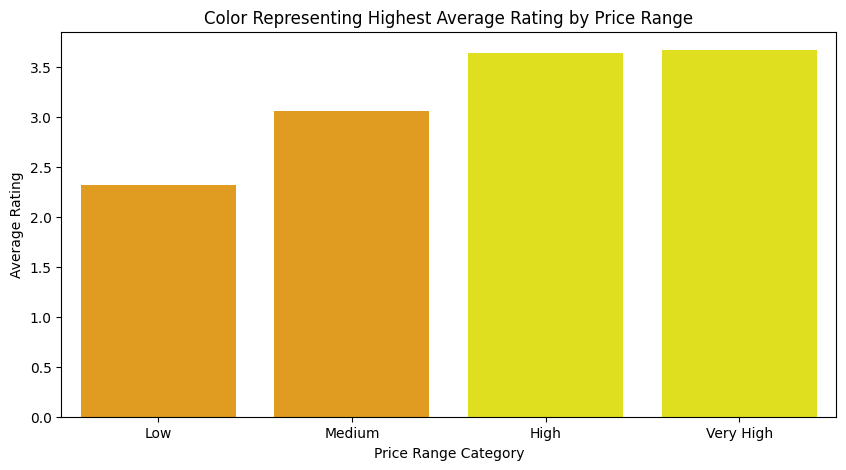

In [28]:
highest_avg_color_per_price_range = data.groupby('Price Range Category')['Rating color'].agg(lambda x: x.value_counts().idxmax())
plt.figure(figsize=(10, 5))
sns.barplot(x=highest_avg_color_per_price_range.index, y=avg_rating_per_price_range.values, palette=highest_avg_color_per_price_range.values)
plt.title('Color Representing Highest Average Rating by Price Range')
plt.xlabel('Price Range Category')
plt.ylabel('Average Rating')
plt.show()